In [203]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [171]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<Axes: xlabel='HeartDisease'>

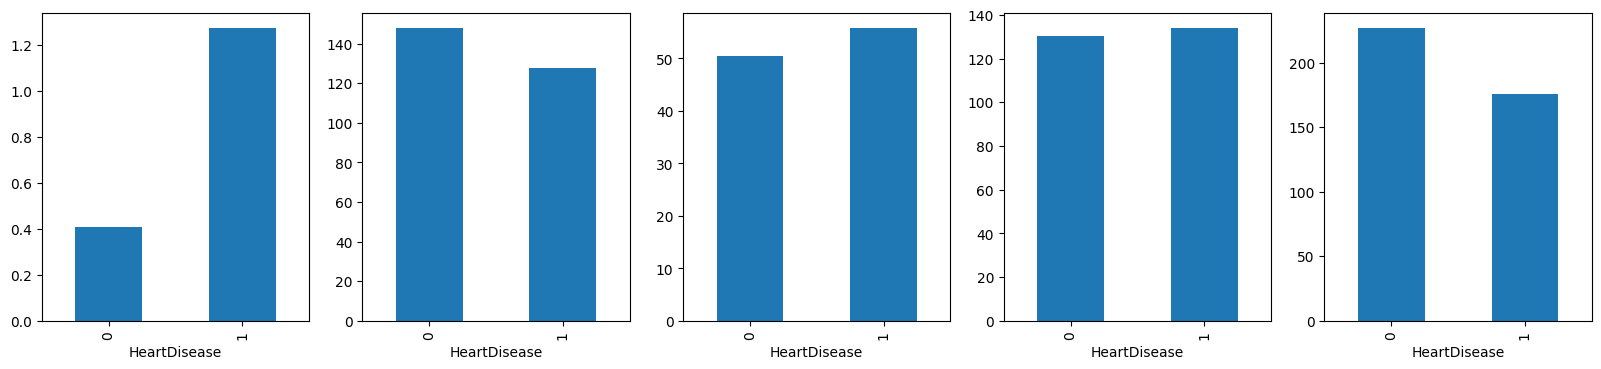

In [61]:
fig,axes = plt.subplots(1,5,figsize=(20,4))
df.groupby(df["HeartDisease"])["Oldpeak"].mean().plot(kind="bar",ax = axes[0])
df.groupby(df["HeartDisease"])["MaxHR"].mean().plot(kind="bar",ax = axes[1])
df.groupby(df["HeartDisease"])["Age"].mean().plot(kind="bar",ax = axes[2])
df.groupby(df["HeartDisease"])["RestingBP"].mean().plot(kind="bar",ax = axes[3])
df.groupby(df["HeartDisease"])["Cholesterol"].mean().plot(kind="bar",ax = axes[4])

<Axes: xlabel='FastingBS'>

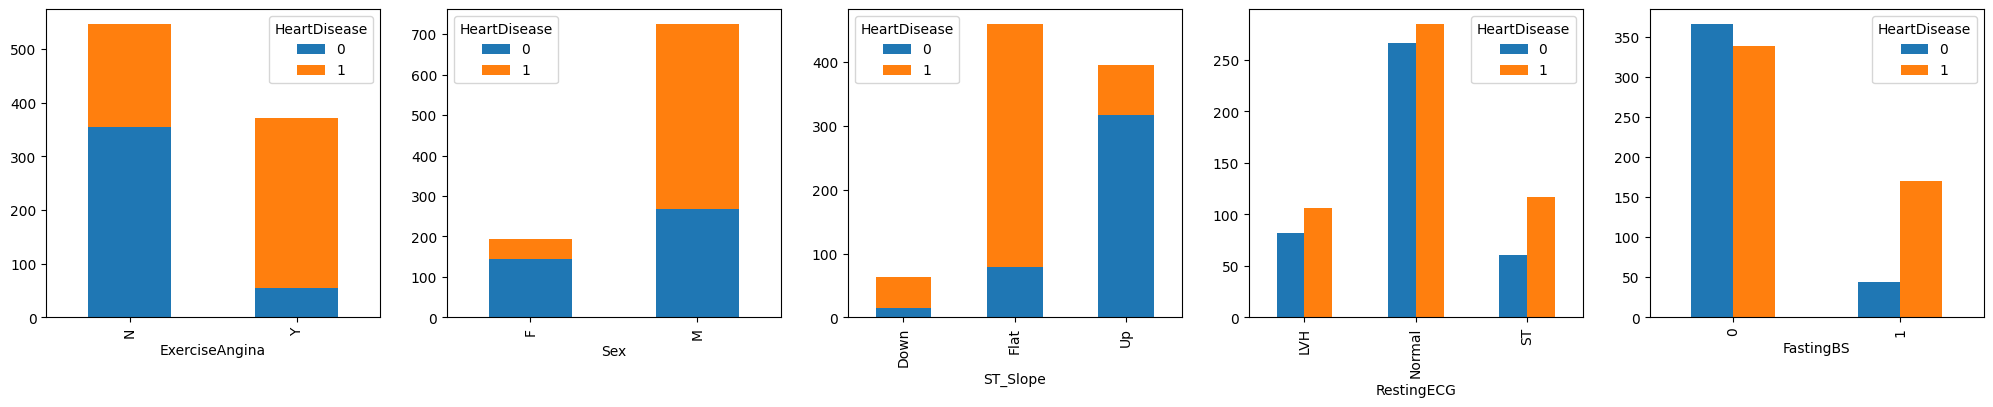

In [81]:
fig,axes = plt.subplots(1,5,figsize=(25,4))
pd.crosstab(df["ExerciseAngina"],df["HeartDisease"]).plot(kind="bar",stacked =True,ax=axes[0])
pd.crosstab(df["Sex"],df["HeartDisease"]).plot(kind="bar",stacked =True,ax=axes[1])
pd.crosstab(df["ST_Slope"],df["HeartDisease"]).plot(kind="bar",stacked =True,ax=axes[2])
pd.crosstab(df["RestingECG"],df["HeartDisease"]).plot(kind="bar",ax=axes[3])
pd.crosstab(df["FastingBS"],df["HeartDisease"]).plot(kind="bar",ax=axes[4])

<Axes: xlabel='RestingECG'>

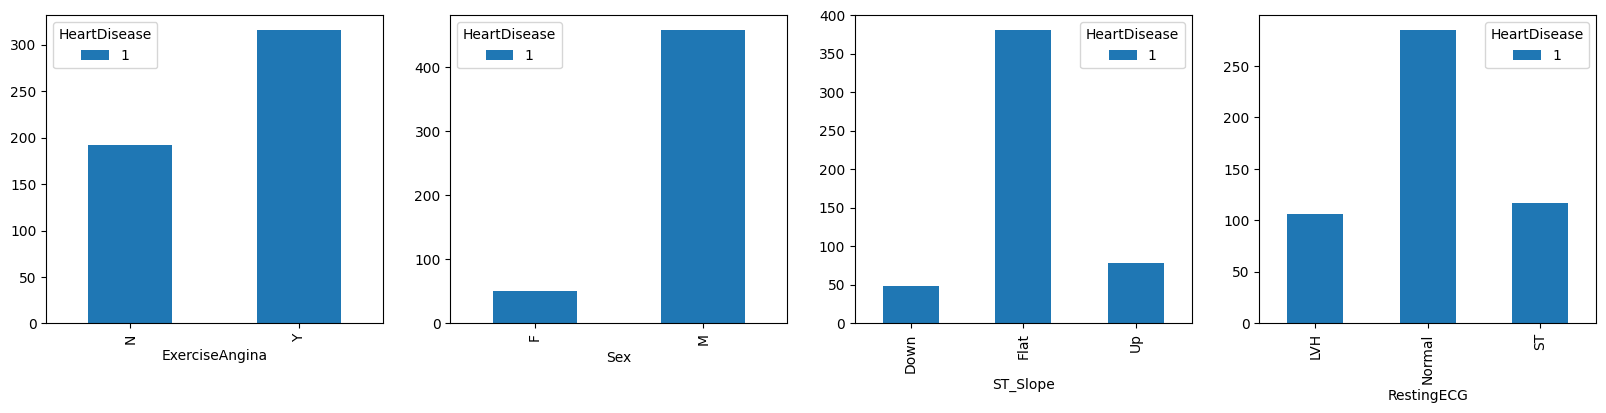

In [ ]:
df1 = df[df["HeartDisease"]==1]
fig,axes = plt.subplots(1,4,figsize=(20,4))
pd.crosstab(df1["ExerciseAngina"],df1["HeartDisease"]).plot(kind="bar",ax=axes[0])
pd.crosstab(df1["Sex"],df1["HeartDisease"]).plot(kind="bar",ax=axes[1])
pd.crosstab(df1["ST_Slope"],df1["HeartDisease"]).plot(kind="bar",ax=axes[2])
pd.crosstab(df1["RestingECG"],df1["HeartDisease"]).plot(kind="bar",ax=axes[3])

In [68]:
df.isna().any(axis=0)  #axis=0 is row and axis=1 is column , that means axis=0 checks all rows at once for each column and axis=1 checks all columns at once for each row

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [199]:
df2 = df.select_dtypes(include=[int,float]) 
st = StandardScaler()
a = df2.drop(["HeartDisease","FastingBS"],axis=1) #axis=1 mean removing the column(1), axis=(0) mean removing the row
X = pd.DataFrame(st.fit_transform(a),columns = a.columns,index = a.index) #Here, we are retaining the index even after scaling by converting it into dataframe thus eliminating the error**
mask = (np.abs(X)<3).all(axis=1)
X = X[mask]
"""  **    Pandas aligns rows based on the index.
So even though d and df2 both have 899 rows, their index values might not match — e.g., one might still have old index values from the original DataFrame (df), 
like [0, 1, 2, 4, 6, 7, 10, ...]. If the indexes don't match, Pandas performs an outer join by default when concatenating along axis=1, resulting in extra rows 
filled with NaNs where the index isn't common to all inputs — hence 918 rows instead of 899.
X is a NumPy array, so X[mask] gives you just the filtered array — no index retained,just positional rows.
But df2[mask] is a Pandas DataFrame — so Pandas retains the original row indices from the unfiltered df2."""
df2 = df2[mask]
c = pd.concat([X,df2["FastingBS"],df2["HeartDisease"]],axis=1)
c

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,HeartDisease
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,0,1
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,0,1
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,0
...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.188999,0.293283,0,1
914,1.536902,0.627078,-0.053049,0.164684,2.357094,1,1
915,0.370100,-0.129513,-0.620168,-0.857069,0.293283,0,1
916,0.370100,-0.129513,0.340275,1.461525,-0.832432,0,1


In [202]:
a = pd.get_dummies(df.select_dtypes('object'),drop_first=True)
a = a[mask]
df3 = pd.concat([c,a],axis=1)
df3

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,0,True,True,False,False,True,False,False,False,True
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,0,1,False,False,True,False,True,False,False,True,False
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,0,True,True,False,False,False,True,False,False,True
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,0,1,False,False,False,False,True,False,True,True,False
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.188999,0.293283,0,1,True,False,False,True,True,False,False,True,False
914,1.536902,0.627078,-0.053049,0.164684,2.357094,1,1,True,False,False,False,True,False,False,True,False
915,0.370100,-0.129513,-0.620168,-0.857069,0.293283,0,1,True,False,False,False,True,False,True,True,False
916,0.370100,-0.129513,0.340275,1.461525,-0.832432,0,1,False,True,False,False,False,False,False,True,False


In [257]:
model = {"LogisticRegression":{"model":LogisticRegression(solver="liblinear"),"param":{"C":[0.01,0.1,1.0,5.0],"penalty":['l1','l2']}},
         "SupportVector":{"model":SVC(gamma="auto"),"param":{"kernel":['linear','rbf'],"C":[10,20]}},
         "RandomForest":{"model":RandomForestClassifier(),"param":{"n_estimators":[2,5,10]}}}
b = []
for i,j in model.items():
    clf = GridSearchCV(j["model"],param_grid=j["param"],cv=10,return_train_score=False)
    clf.fit(df3.drop("HeartDisease",axis=1),df3["HeartDisease"])
    b.append({"Model" : i,
    "Best Score" : clf.best_score_,
    "Best Parameter" : clf.best_params_})
pd.DataFrame(b,columns=["Model","Best Score","Best Parameter"])


,Model,Best Score,Best Parameter
0,LogisticRegression,0.849738,"{'C': 5.0, 'penalty': 'l1'}"
1,SupportVector,0.849725,"{'C': 20, 'kernel': 'linear'}"
2,RandomForest,0.821873,{'n_estimators': 5}


In [263]:
p = PCA(0.80)
X = df3.drop("HeartDisease",axis=1)
Y = df3["HeartDisease"]
Xp = p.fit_transform(X)
np.shape(Xp)
b = []
for i,j in model.items():
    clf = GridSearchCV(j["model"],param_grid=j["param"],cv=5,return_train_score=False)
    clf.fit(Xp,Y)
    b.append({"Model" : i,
    "Best Score" : clf.best_score_,
    "Best Parameter" : clf.best_params_})
pd.DataFrame(b,columns=["Model","Best Score","Best Parameter"])


,Model,Best Score,Best Parameter
0,LogisticRegression,0.815276,"{'C': 0.01, 'penalty': 'l2'}"
1,SupportVector,0.797430,"{'C': 10, 'kernel': 'linear'}"
2,RandomForest,0.767443,{'n_estimators': 10}


In [251]:
print(p.explained_variance_ratio_)

[0.28929601 0.17078863 0.12283301 0.09951176 0.09033975 0.04705497]
